# Fraud Detection Analysis

# Importing All the necessary libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
drive.mount('/content/drive/')
data_path = '/content/drive/MyDrive/Fraud_Detection/Fraud.csv'

Mounted at /content/drive/


# Load Dataset

In [6]:
data = pd.read_csv(data_path)
data.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

# Data Preprocessing
In this section I have done the data preprocessing work.

1. Dropping tuples having missing values
2. Dropping columns with irrelavent data
3. Handling Outliers
4. One-Hot Encoding



## Handling Missing Values

In [7]:
data.dropna(inplace=True)

## Drop irrelavent columns
### I have dropped the 'step', 'nameOrig', 'nameDest' columns based on basic understanding of the problem and the dataset.
### In my understanding of the problem, names of the fraudulant or victim does not matter in this scenario.

In [8]:
data.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)


## Handling Outliers
### Outliers in a dataset effect the model rule base, so elimination of these outliers are important.
### 'amount' column has outliers are shown by the following box plot, so removing the outliers.


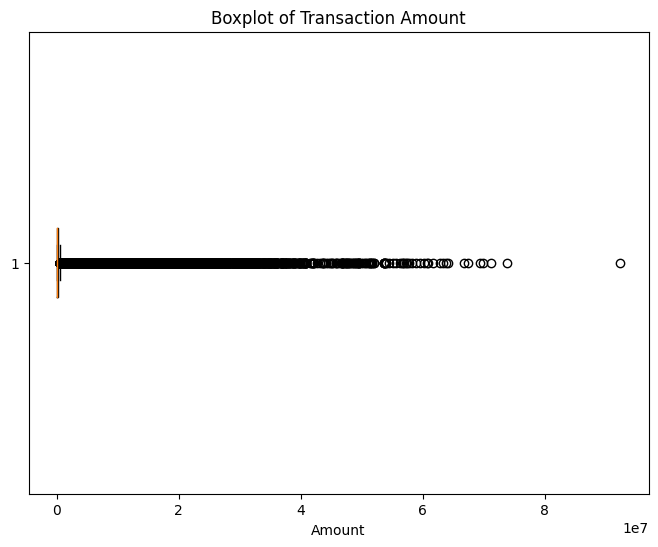

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


In [14]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['amount'], vert=False)
plt.xlabel('Amount')
plt.title('Boxplot of Transaction Amount')
plt.show()
print(data['amount'].describe())

In [15]:
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['amount'] >= Q1 - 1.5 * IQR) & (data['amount'] <= Q3 + 1.5 * IQR)]

In [16]:
data.describe

<bound method NDFrame.describe of              type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         PAYMENT    9839.64      170136.00       160296.36            0.00   
1         PAYMENT    1864.28       21249.00        19384.72            0.00   
2        TRANSFER     181.00         181.00            0.00            0.00   
3        CASH_OUT     181.00         181.00            0.00        21182.00   
4         PAYMENT   11668.14       41554.00        29885.86            0.00   
...           ...        ...            ...             ...             ...   
6362609  CASH_OUT  258355.42      258355.42            0.00        25176.67   
6362610  TRANSFER   63416.99       63416.99            0.00            0.00   
6362611  CASH_OUT   63416.99       63416.99            0.00       276433.18   
6362614  TRANSFER  339682.13      339682.13            0.00            0.00   
6362615  CASH_OUT  339682.13      339682.13            0.00            0.00   

         newbalan

## One-Hot Encoding
### Column 'type' denotes the type of transaction. The types are : 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'
### We need to change these values into 0-1 format, so we perform One-Hot Encoding

In [18]:
df = pd.get_dummies(data, columns=['type'], prefix=['type'])
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


# Machine Learning Classification (Model Training)
Both Random Forrest and Gradient Boosting are a good choice for this problem.
As we can see, it is a classification problem, that is, the output required is the decion between two classes(for this case). The data set very very huge and has a lot of features after preprocessing, so using Random Forrest and Gradient Boosting makes sense.

## Split data into features (X) and target (y)

In [19]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

## Split data into training and testing sets


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature scaling


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize classifiers


In [22]:
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

## Fit classifiers on the training data


In [23]:
rf_classifier.fit(X_train_scaled, y_train)
gb_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

## Predictions

In [24]:
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Confusion Matrix and Classification Reports
This sections deals with analysis of the models based on the confusion matrix and classification reports(accuracy, recall, precision and f1_score).

In [46]:
def show_cm(y_pred, name):
  # Calculate confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # Calculate precision, recall, and f1-score
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Print the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix for {name}')
  plt.show()

  # Print accuracy, precision, recall, and f1-score
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-Score:", f1)

## For Random Forrest

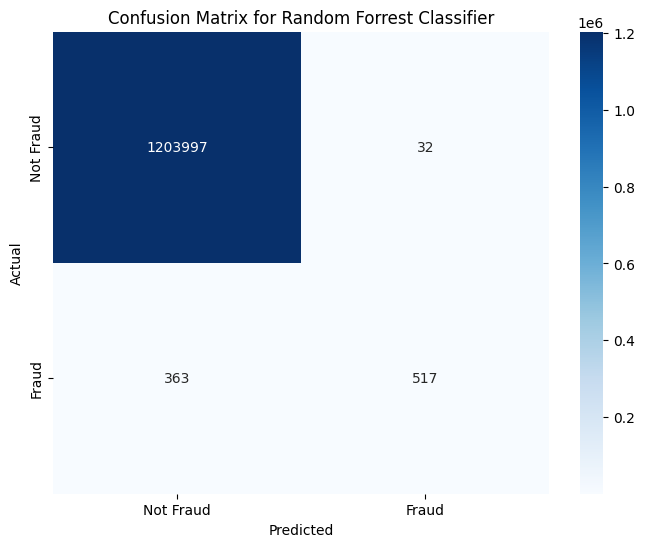

Accuracy: 0.9996721744131715
Precision: 0.941712204007286
Recall: 0.5875
F1-Score: 0.7235829251224632


In [47]:
show_cm(y_pred_rf, "Random Forrest Classifier")

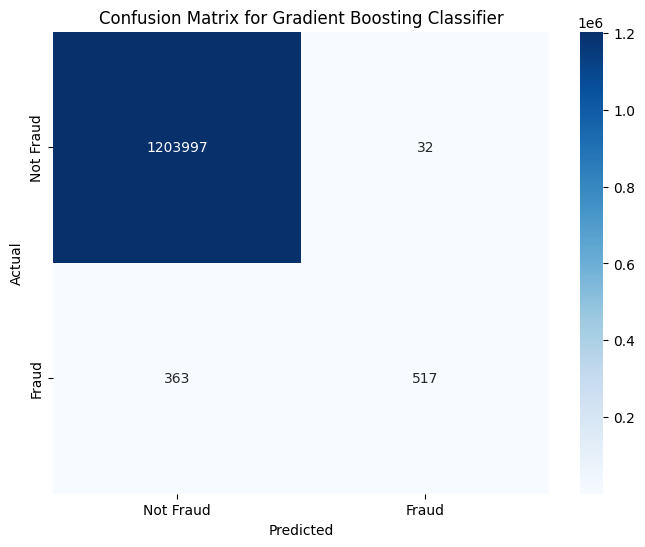

Accuracy: 0.9996721744131715
Precision: 0.941712204007286
Recall: 0.5875
F1-Score: 0.7235829251224632


In [48]:
show_cm(y_pred_rf, "Gradient Boosting Classifier")

### **As we can see, the precision, recall and f1_score of gradient boosting is 0.0. This may be due to overfitting of the model. Gradient Bossting works well with large dataset but is also prone to overfitting.**

### **So now we are going to discard the gradient boosting model.**

### **Random Forest is our final model now!**

# Finding Key Factors
In this section, key features analysis of the best performing model is done.

In [39]:
def getImportance(curr_model):
  # Get feature importances from the model
  feature_importances = curr_model.feature_importances_

  # Get the column names from X_train_scaled
  column_names = X.columns

  # Create a DataFrame to show feature importance
  feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})

  # Sort the DataFrame by importance in descending order
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

  # Plotting feature importances
  plt.figure(figsize=(10, 6))
  plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title('Feature Importances')
  plt.show()

  # Display the top N key factors
  top_n = 11  # Change this value to the number of top factors you want to display
  print(f'Key Factors for Predicting Fraudulent Customers:')
  print(feature_importance_df.head(top_n))


## For Random Forrest

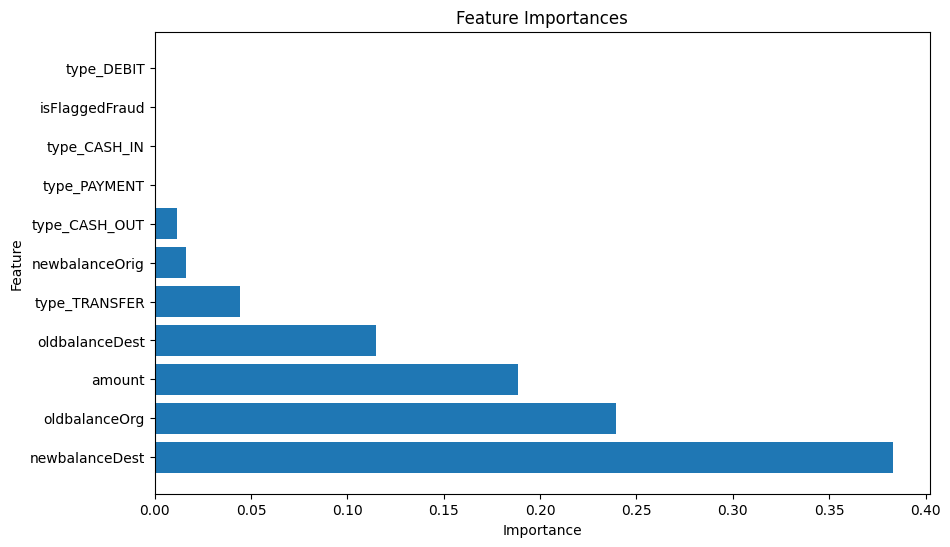

Key Factors for Predicting Fraudulent Customers:
           Feature  Importance
4   newbalanceDest    0.382996
1    oldbalanceOrg    0.239306
0           amount    0.188741
3   oldbalanceDest    0.115090
10   type_TRANSFER    0.044064
2   newbalanceOrig    0.016460
7    type_CASH_OUT    0.011746
9     type_PAYMENT    0.000950
6     type_CASH_IN    0.000320
5   isFlaggedFraud    0.000262
8       type_DEBIT    0.000064


In [40]:
getImportance(rf_classifier)

In the above output we can see that the dominating factors or the most important features for the random forest model with the threshhold involvement of 10% are: newbalanceDest(0.382996), oldbalanceOrg(0.239306), amount(0.188741) and oldbalanceDest(0.115090).

All of this make sense, let me explain how:
1. **newbalanceDest**: It is the balance of the recepient after the transaction. A fradulant transaction is initiated after gauging the net income by the fraudster.
2. **oldbalanceOrg**: It is the balance of the originating account before the transaction takes place. A fraudster will likely target a person with a lot of money, so while doing this analysis, the fraudster will definetly take into account the balance of the individual he is willing to cheat.
3. **amount**: It goes without saying that the amount of transaction will be key to determine the fraud.
4. **oldbalanceDest**: Old balance of the recepient will also be important as the fraudulent will likely make a new bank account to commence the fraud. It is also seen that this figure iss generally low for tuples that show fraudulent transactions.

Also, we can clearly see that the type of transaction does not matter in the fraud detection scenario. This is beacause fradulent transactions can take place in the form of any type of transaction.
Moreover, 'isFlaggedFraud' is also not at all important.

# Concluding remarks

Fraud detection is one of the most basic problems in the machine learning space. It is helpful to have a model that can classify between a fradulent transaction and a normal one so that measures can be taken as soon as possible. Such systems adds another layer of protection in the already fairly secure banking systems.

The above code tries to analyze a large dataset of transactions and build a model that can classify between a fradulent and a normal transaction.
All the selected features were numeric barring one. This categorical column was handled with the use of one-hot encoding.
Due to the size of the data set, Random Forrest classifier was used.

## What kind of prevention should be adopted while company update its infrastructure?

Throuh the above analysis following conclusions can be made:
1. Type of transaction is not important
2. Balance before and after the transactions is crucial
3. The existing business model flagging the transactions does not work.

So, I propose, the existing system of flagging of a transaction if it exceeds 200.000, should be discontinued, as it is proven by my analysis that it is working very poorly.

Secondly, the problem of fraudulent transaction mainly depends on the balances of the originating and the destination accounts, so new account holders should be monitored. New account holders should verified using government portals and there intensions of using an account should be made sure of.



## Assuming these actions have been implemented, how would you determine if they work?

Reviews can be conducted. After a period of 30 days, again the same analysis can be performed to check the status of the system.